In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('housing.csv')
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrType_Nan,BsmtQual_Nan,BsmtCond_Nan,BsmtExposure_Nan,BsmtFinType1_Nan,BsmtFinType2_Nan,Electrical_Nan,GarageType_Nan,GarageFinish_Nan,GarageQual_Nan,GarageCond_Nan,LotFrontage_Nan,MasVnrArea_Nan,GarageYrBlt_Nan,FireplaceQu+_Nan
0,0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,65.0,196.0,2003.0,Missing
1,1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA,80.0,0.0,1976.0,TA
2,2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,68.0,162.0,2001.0,TA
3,3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA,60.0,0.0,1998.0,Gd
4,4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,84.0,350.0,2000.0,TA


In [4]:
feat_nan=[feature for feature in df.columns if df[feature].isnull().sum()>0]
df[feat_nan].isnull().sum()

Series([], dtype: float64)

In [5]:
df=df.drop(['Unnamed: 0', 'MSSubClass','OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'KitchenAbvGr', 'EnclosedPorch', 'MiscVal', 'PoolArea', 'BsmtHalfBath', 'MoSold', '3SsnPorch' ], axis=1)
df.head()

,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,YrSold,SaleType,SaleCondition,SalePrice,MasVnrType_Nan,BsmtQual_Nan,BsmtCond_Nan,BsmtExposure_Nan,BsmtFinType1_Nan,BsmtFinType2_Nan,Electrical_Nan,GarageType_Nan,GarageFinish_Nan,GarageQual_Nan,GarageCond_Nan,LotFrontage_Nan,MasVnrArea_Nan,GarageYrBlt_Nan,FireplaceQu+_Nan
0,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,150,856,GasA,Ex,Y,856,854,1710,1,2,1,3,Gd,8,Typ,0,2,548,Y,0,61,0,2008,WD,Normal,208500,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,65.0,196.0,2003.0,Missing
1,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,284,1262,GasA,Ex,Y,1262,0,1262,0,2,0,3,TA,6,Typ,1,2,460,Y,298,0,0,2007,WD,Normal,181500,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA,80.0,0.0,1976.0,TA
2,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,434,920,GasA,Ex,Y,920,866,1786,1,2,1,3,Gd,6,Typ,1,2,608,Y,0,42,0,2008,WD,Normal,223500,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,68.0,162.0,2001.0,TA
3,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,540,756,GasA,Gd,Y,961,756,1717,1,1,0,3,Gd,7,Typ,1,3,642,Y,0,35,0,2006,WD,Abnorml,140000,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA,60.0,0.0,1998.0,Gd
4,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,490,1145,GasA,Ex,Y,1145,1053,2198,1,2,1,4,Gd,9,Typ,1,3,836,Y,192,84,0,2008,WD,Normal,250000,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,84.0,350.0,2000.0,TA


In [6]:
old_names = ['LotFrontage_Nan', 'MasVnrArea_Nan', 'MasVnrType_Nan', 'GarageYrBlt_Nan', 'BsmtQual_Nan', 'BsmtCond_Nan', 'BsmtExposure_Nan', 'BsmtFinType1_Nan', 'BsmtFinType2_Nan', 'Electrical_Nan', 'GarageType_Nan', 'GarageFinish_Nan', 'GarageQual_Nan', 'GarageCond_Nan', 'FireplaceQu+_Nan'] 
new_names = ['LotFrontage', 'MasVnrArea', 'MasVnrType', 'GarageYrBlt', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [7]:
df.head()

,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,YrSold,SaleType,SaleCondition,SalePrice,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,LotFrontage,MasVnrArea,GarageYrBlt,FireplaceQu
0,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,150,856,GasA,Ex,Y,856,854,1710,1,2,1,3,Gd,8,Typ,0,2,548,Y,0,61,0,2008,WD,Normal,208500,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,65.0,196.0,2003.0,Missing
1,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,284,1262,GasA,Ex,Y,1262,0,1262,0,2,0,3,TA,6,Typ,1,2,460,Y,298,0,0,2007,WD,Normal,181500,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA,80.0,0.0,1976.0,TA
2,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,434,920,GasA,Ex,Y,920,866,1786,1,2,1,3,Gd,6,Typ,1,2,608,Y,0,42,0,2008,WD,Normal,223500,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,68.0,162.0,2001.0,TA
3,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,540,756,GasA,Gd,Y,961,756,1717,1,1,0,3,Gd,7,Typ,1,3,642,Y,0,35,0,2006,WD,Abnorml,140000,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA,60.0,0.0,1998.0,Gd
4,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,490,1145,GasA,Ex,Y,1145,1053,2198,1,2,1,4,Gd,9,Typ,1,3,836,Y,192,84,0,2008,WD,Normal,250000,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,84.0,350.0,2000.0,TA


In [8]:
df.shape

(1460, 65)

In [9]:
feat_cat=[feature for feature in df.columns if df[feature].dtype =='O']
df[feat_cat].head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,FireplaceQu
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,Missing
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA,TA
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,TA
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA,Gd
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,TA


In [10]:
for feature in feat_cat:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is ExterQual and number of categories are 4
The feature is ExterCond and number of c

In [11]:
d=df.copy()

In [12]:
for feature in feat_cat:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)
df.head()

,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,YrSold,SaleType,SaleCondition,SalePrice,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,LotFrontage,MasVnrArea,GarageYrBlt,FireplaceQu
0,3,8450,1,0,1,1,0,0,16,4,4,4,6,7,2003,2003,1,2,11,12,2,3,5,706,150,856,5,4,1,856,854,1710,1,2,1,3,2,8,6,0,2,548,2,0,61,0,2008,4,4,208500,2,2,2,0,5,4,4,4,1,2,4,65.0,196.0,2003.0,1
1,3,9600,1,0,1,1,1,0,20,2,4,4,5,6,1976,1976,1,2,4,5,1,3,2,978,284,1262,5,4,1,1262,0,1262,0,2,0,3,1,6,6,1,2,460,2,298,0,0,2007,4,4,181500,1,2,2,3,3,4,4,4,1,2,4,80.0,0.0,1976.0,3
2,3,11250,1,1,1,1,0,0,16,4,4,4,6,7,2001,2002,1,2,11,12,2,3,5,486,434,920,5,4,1,920,866,1786,1,2,1,3,2,6,6,1,2,608,2,0,42,0,2008,4,4,223500,2,2,2,1,5,4,4,4,1,2,4,68.0,162.0,2001.0,3
3,3,9550,1,1,1,1,2,0,17,4,4,4,6,7,1915,1970,1,2,5,8,1,3,1,216,540,756,5,3,1,961,756,1717,1,1,0,3,2,7,6,1,3,642,2,0,35,0,2006,4,1,140000,1,1,3,0,3,4,4,1,0,2,4,60.0,0.0,1998.0,4
4,3,14260,1,1,1,1,1,0,24,4,4,4,6,8,2000,2000,1,2,11,12,2,3,5,655,490,1145,5,4,1,1145,1053,2198,1,2,1,4,2,9,6,1,3,836,2,192,84,0,2008,4,4,250000,2,2,2,2,5,4,4,4,1,2,4,84.0,350.0,2000.0,3


In [13]:
df.Neighborhood.unique()

array([16, 20, 17, 24, 11, 19, 13,  5,  3,  6, 23, 10, 12,  1,  0,  4, 21,
       14, 22, 18,  9, 15,  2,  8,  7])

In [14]:
df.shape

(1460, 65)

FEATURE SCALING (MIN MAX SCALER)

In [15]:
feature_scale=[feature for feature in df.columns if feature not in ['SalePrice']]


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
df=pd.concat([df[['SalePrice']].reset_index(drop=True), pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)], axis=1)
df.head()

,SalePrice,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,YrSold,SaleType,SaleCondition,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,LotFrontage,MasVnrArea,GarageYrBlt,FireplaceQu
0,208500,0.75,0.033420,1.0,0.000000,0.333333,1.0,0.00,0.0,0.666667,0.50,0.571429,1.0,0.857143,0.666667,0.949275,0.883333,0.2,0.285714,0.785714,0.800000,0.666667,0.75,1.0,0.125089,0.064212,0.140098,1.0,1.00,1.0,0.119780,0.413559,0.259231,0.333333,0.666667,0.5,0.375,0.666667,0.500000,1.0,0.000000,0.50,0.386460,1.0,0.000000,0.111517,0.0,0.50,0.5,0.8,0.666667,0.666667,0.666667,0.000000,1.0,0.8,1.0,0.8,0.5,0.5,1.0,0.150685,0.12250,0.936364,0.2
1,181500,0.75,0.038795,1.0,0.000000,0.333333,1.0,0.25,0.0,0.833333,0.25,0.571429,1.0,0.714286,0.555556,0.753623,0.433333,0.2,0.285714,0.285714,0.333333,0.333333,0.75,0.4,0.173281,0.121575,0.206547,1.0,1.00,1.0,0.212942,0.000000,0.174830,0.000000,0.666667,0.0,0.375,0.333333,0.333333,1.0,0.333333,0.50,0.324401,1.0,0.347725,0.000000,0.0,0.25,0.5,0.8,0.333333,0.666667,0.666667,1.000000,0.6,0.8,1.0,0.8,0.5,0.5,1.0,0.202055,0.00000,0.690909,0.6
2,223500,0.75,0.046507,1.0,0.333333,0.333333,1.0,0.00,0.0,0.666667,0.50,0.571429,1.0,0.857143,0.666667,0.934783,0.866667,0.2,0.285714,0.785714,0.800000,0.666667,0.75,1.0,0.086109,0.185788,0.150573,1.0,1.00,1.0,0.134465,0.419370,0.273549,0.333333,0.666667,0.5,0.375,0.666667,0.333333,1.0,0.333333,0.50,0.428773,1.0,0.000000,0.076782,0.0,0.50,0.5,0.8,0.666667,0.666667,0.666667,0.333333,1.0,0.8,1.0,0.8,0.5,0.5,1.0,0.160959,0.10125,0.918182,0.6
3,140000,0.75,0.038561,1.0,0.333333,0.333333,1.0,0.50,0.0,0.708333,0.50,0.571429,1.0,0.857143,0.666667,0.311594,0.333333,0.2,0.285714,0.357143,0.533333,0.333333,0.75,0.2,0.038271,0.231164,0.123732,1.0,0.75,1.0,0.143873,0.366102,0.260550,0.333333,0.333333,0.0,0.375,0.666667,0.416667,1.0,0.333333,0.75,0.452750,1.0,0.000000,0.063985,0.0,0.00,0.5,0.2,0.333333,0.333333,1.000000,0.000000,0.6,0.8,1.0,0.2,0.0,0.5,1.0,0.133562,0.00000,0.890909,0.8
4,250000,0.75,0.060576,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.50,0.571429,1.0,0.857143,0.777778,0.927536,0.833333,0.2,0.285714,0.785714,0.800000,0.666667,0.75,1.0,0.116052,0.209760,0.187398,1.0,1.00,1.0,0.186095,0.509927,0.351168,0.333333,0.666667,0.5,0.500,0.666667,0.583333,1.0,0.333333,0.75,0.589563,1.0,0.224037,0.153565,0.0,0.50,0.5,0.8,0.666667,0.666667,0.666667,0.666667,1.0,0.8,1.0,0.8,0.5,0.5,1.0,0.215753,0.21875,0.909091,0.6


FEATURE SELECTION USING 3 TECHNIQUES

CHI2 TEST (gives poor performance and picking up wrong feature)

CORRELATION TECHNIQUE (GIVES GOOD RESULT)

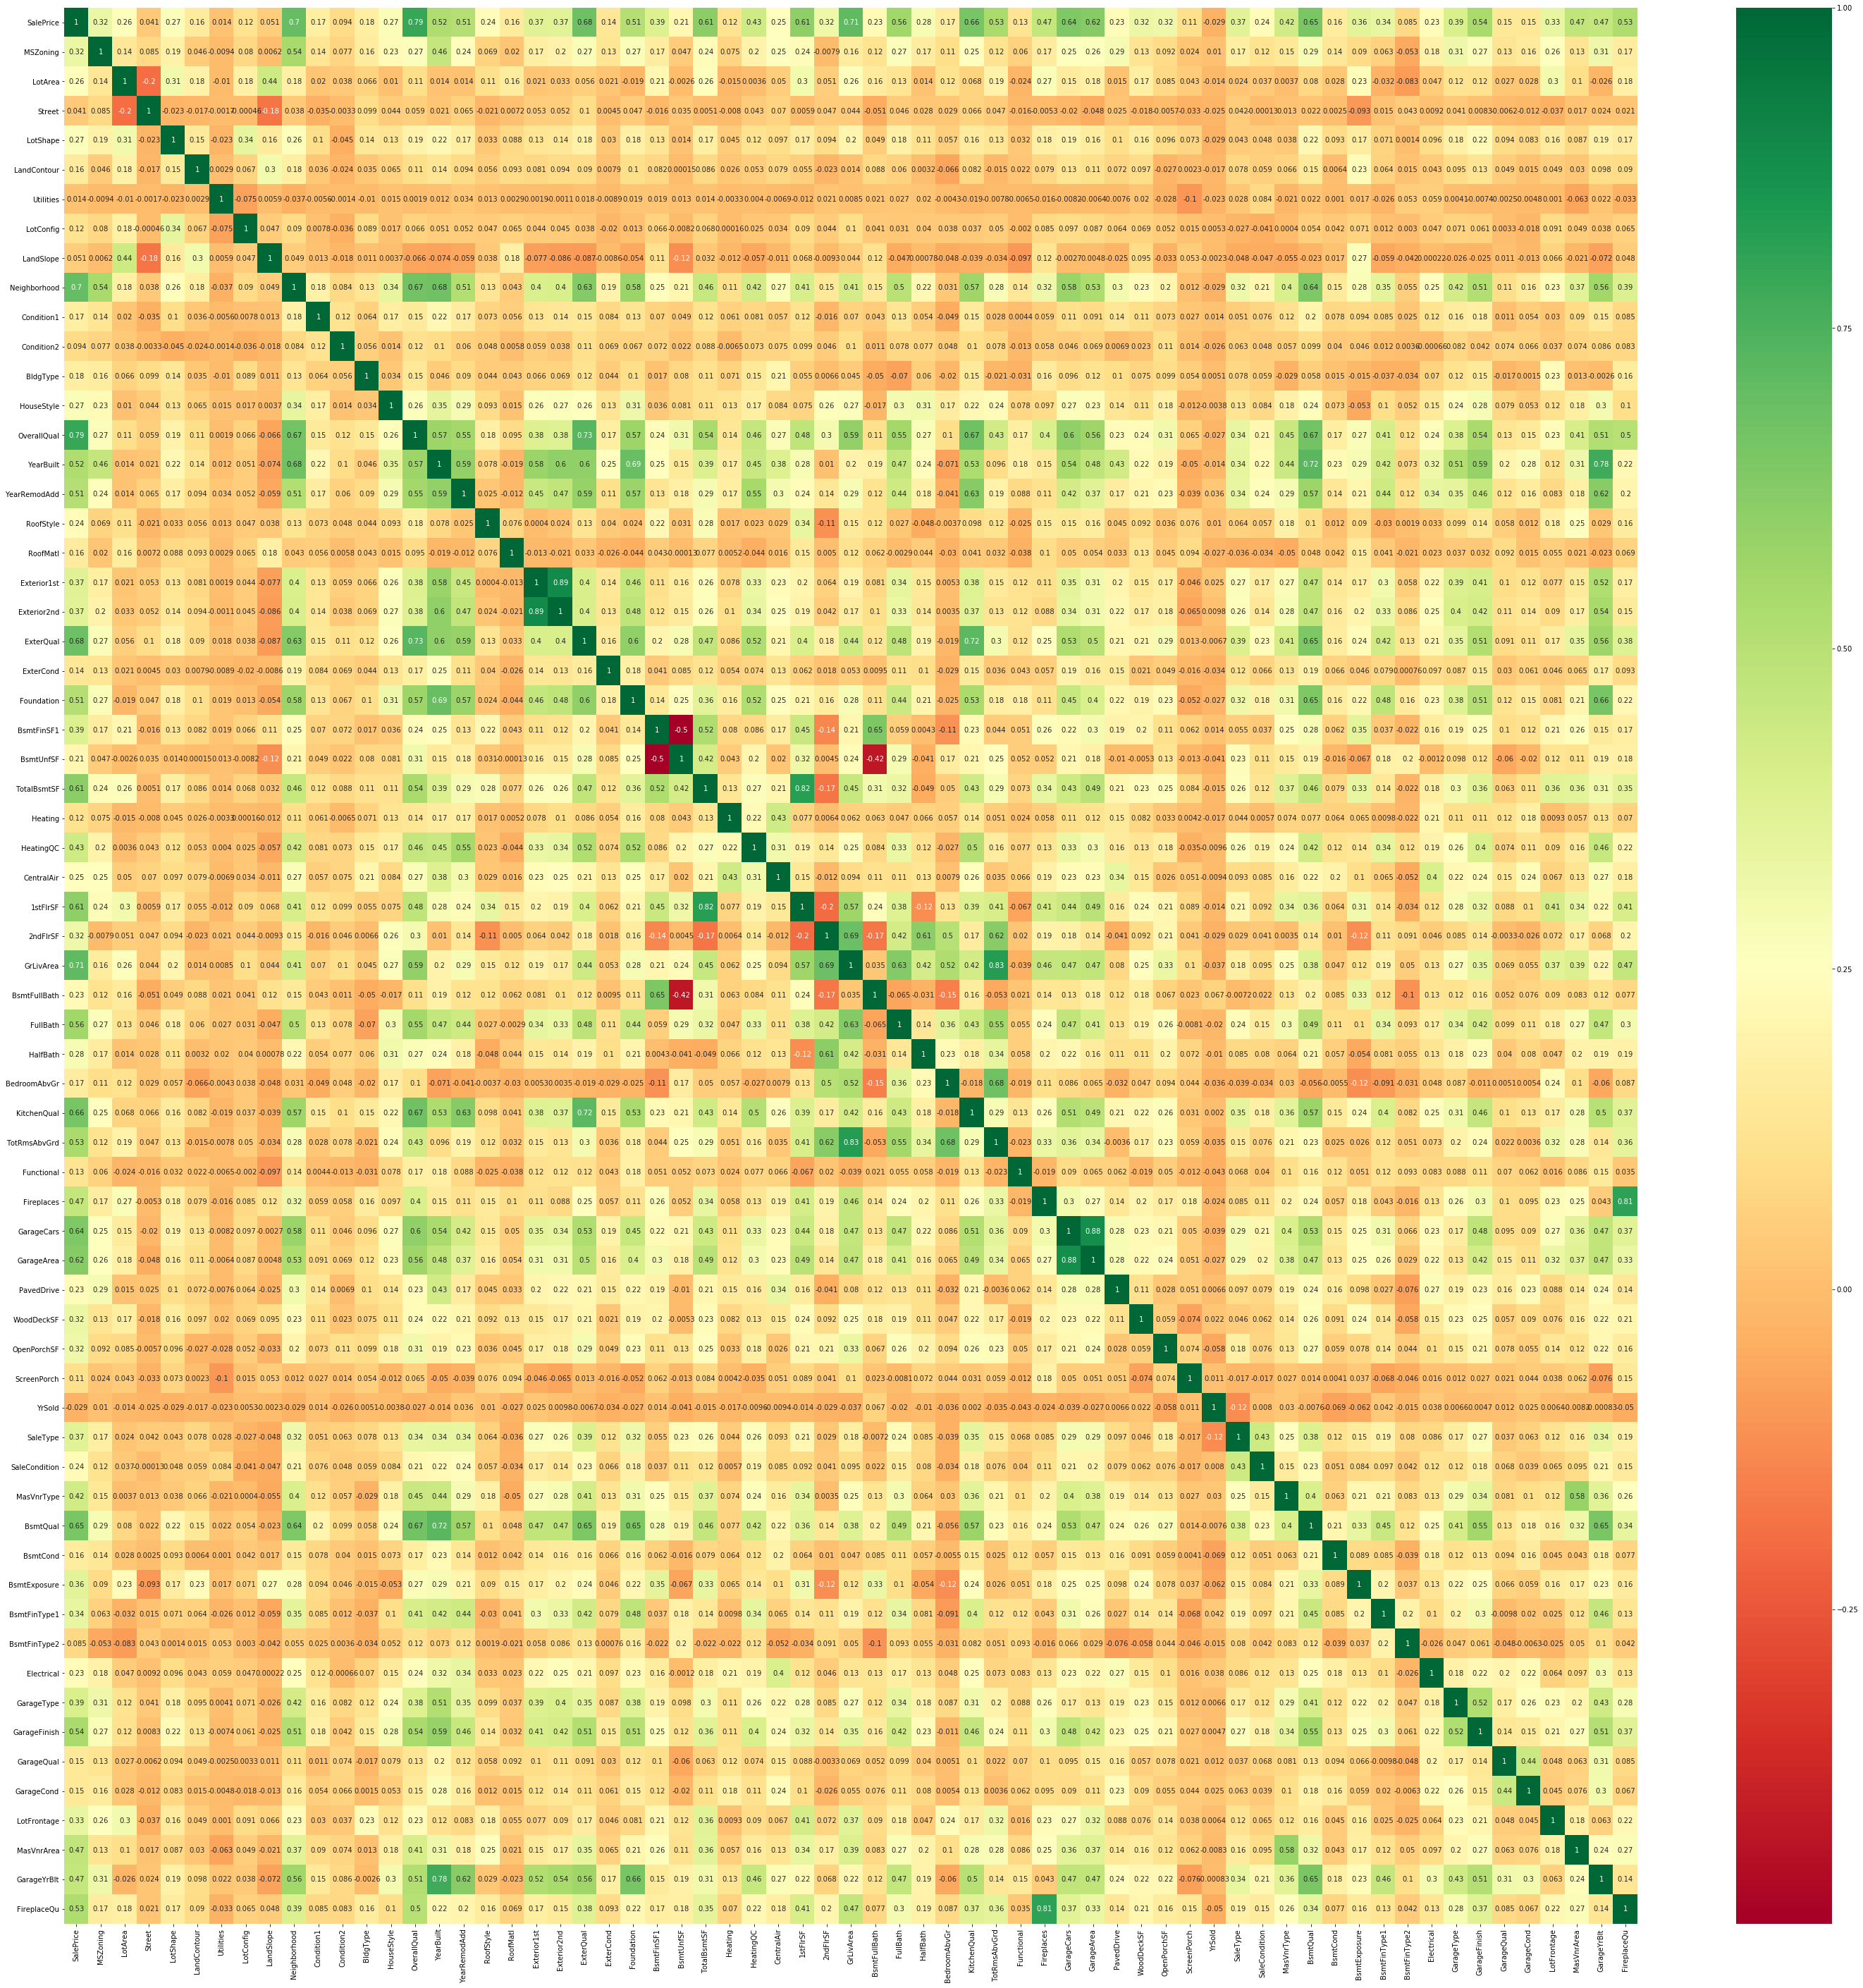

In [17]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
df.head()

,SalePrice,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,YrSold,SaleType,SaleCondition,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,LotFrontage,MasVnrArea,GarageYrBlt,FireplaceQu
0,208500,0.75,0.033420,1.0,0.000000,0.333333,1.0,0.00,0.0,0.666667,0.50,0.571429,1.0,0.857143,0.666667,0.949275,0.883333,0.2,0.285714,0.785714,0.800000,0.666667,0.75,1.0,0.125089,0.064212,0.140098,1.0,1.00,1.0,0.119780,0.413559,0.259231,0.333333,0.666667,0.5,0.375,0.666667,0.500000,1.0,0.000000,0.50,0.386460,1.0,0.000000,0.111517,0.0,0.50,0.5,0.8,0.666667,0.666667,0.666667,0.000000,1.0,0.8,1.0,0.8,0.5,0.5,1.0,0.150685,0.12250,0.936364,0.2
1,181500,0.75,0.038795,1.0,0.000000,0.333333,1.0,0.25,0.0,0.833333,0.25,0.571429,1.0,0.714286,0.555556,0.753623,0.433333,0.2,0.285714,0.285714,0.333333,0.333333,0.75,0.4,0.173281,0.121575,0.206547,1.0,1.00,1.0,0.212942,0.000000,0.174830,0.000000,0.666667,0.0,0.375,0.333333,0.333333,1.0,0.333333,0.50,0.324401,1.0,0.347725,0.000000,0.0,0.25,0.5,0.8,0.333333,0.666667,0.666667,1.000000,0.6,0.8,1.0,0.8,0.5,0.5,1.0,0.202055,0.00000,0.690909,0.6
2,223500,0.75,0.046507,1.0,0.333333,0.333333,1.0,0.00,0.0,0.666667,0.50,0.571429,1.0,0.857143,0.666667,0.934783,0.866667,0.2,0.285714,0.785714,0.800000,0.666667,0.75,1.0,0.086109,0.185788,0.150573,1.0,1.00,1.0,0.134465,0.419370,0.273549,0.333333,0.666667,0.5,0.375,0.666667,0.333333,1.0,0.333333,0.50,0.428773,1.0,0.000000,0.076782,0.0,0.50,0.5,0.8,0.666667,0.666667,0.666667,0.333333,1.0,0.8,1.0,0.8,0.5,0.5,1.0,0.160959,0.10125,0.918182,0.6
3,140000,0.75,0.038561,1.0,0.333333,0.333333,1.0,0.50,0.0,0.708333,0.50,0.571429,1.0,0.857143,0.666667,0.311594,0.333333,0.2,0.285714,0.357143,0.533333,0.333333,0.75,0.2,0.038271,0.231164,0.123732,1.0,0.75,1.0,0.143873,0.366102,0.260550,0.333333,0.333333,0.0,0.375,0.666667,0.416667,1.0,0.333333,0.75,0.452750,1.0,0.000000,0.063985,0.0,0.00,0.5,0.2,0.333333,0.333333,1.000000,0.000000,0.6,0.8,1.0,0.2,0.0,0.5,1.0,0.133562,0.00000,0.890909,0.8
4,250000,0.75,0.060576,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.50,0.571429,1.0,0.857143,0.777778,0.927536,0.833333,0.2,0.285714,0.785714,0.800000,0.666667,0.75,1.0,0.116052,0.209760,0.187398,1.0,1.00,1.0,0.186095,0.509927,0.351168,0.333333,0.666667,0.5,0.500,0.666667,0.583333,1.0,0.333333,0.75,0.589563,1.0,0.224037,0.153565,0.0,0.50,0.5,0.8,0.666667,0.666667,0.666667,0.666667,1.0,0.8,1.0,0.8,0.5,0.5,1.0,0.215753,0.21875,0.909091,0.6


In [19]:
df.columns

Index(['SalePrice', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'ScreenPorch', 'YrSold', 'SaleType', 'SaleCondition',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
       'FireplaceQu'],
      

In [20]:
#i am dropping unnecessary columns in the table. only keep the top 10 correlation feature coulmn in the table. Here is my original table.
df=df.drop(['MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', '2ndFlrSF',  'BsmtFullBath', 'HalfBath','BedroomAbvGr', 'Functional', 'Fireplaces', 'PavedDrive', 'WoodDeckSF','OpenPorchSF', 'ScreenPorch', 'YrSold', 'SaleType', 'SaleCondition', 'MasVnrType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'FireplaceQu'], axis=1)
df.head()

,SalePrice,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,BsmtQual
0,208500,0.666667,0.666667,0.949275,0.883333,0.666667,0.140098,0.119780,0.259231,0.666667,0.666667,0.500000,0.50,0.386460,0.666667
1,181500,0.833333,0.555556,0.753623,0.433333,0.333333,0.206547,0.212942,0.174830,0.666667,0.333333,0.333333,0.50,0.324401,0.666667
2,223500,0.666667,0.666667,0.934783,0.866667,0.666667,0.150573,0.134465,0.273549,0.666667,0.666667,0.333333,0.50,0.428773,0.666667
3,140000,0.708333,0.666667,0.311594,0.333333,0.333333,0.123732,0.143873,0.260550,0.333333,0.666667,0.416667,0.75,0.452750,0.333333
4,250000,1.000000,0.777778,0.927536,0.833333,0.666667,0.187398,0.186095,0.351168,0.666667,0.666667,0.583333,0.75,0.589563,0.666667


In [21]:
x=df.iloc[:, 1:]
y=df.SalePrice

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape

(1168, 14)

In [23]:
x_test.shape

(292, 14)

Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)

In [26]:
score

0.6910407962324545

Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300, max_depth=90, min_samples_leaf=3, max_features=3, min_samples_split=8, random_state=1)
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)

In [28]:
score 

0.8420398179505921

XGBOOST REGRESSOR

In [33]:
!pip install xgboost

In [34]:
import xgboost
regressor=xgboost.XGBRegressor()
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)


In [35]:
score

0.8480745002225019